# Modeling

## Preparation

In [39]:
# Loading Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import sys
from IPython.display import Image
import copy
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


import causalnex
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.discretiser import Discretiser
from causalnex.structure import DAGRegressor
from causalnex.inference import InferenceEngine
from causalnex.network import BayesianNetwork
from causalnex.network.sklearn import BayesianNetworkClassifier
from causalnex.discretiser.discretiser_strategy import (
    DecisionTreeSupervisedDiscretiserMethod,
)
from causalnex.network import BayesianNetwork
from causalnex.inference import InferenceEngine

import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from utils import Utils
Util = Utils("../logs/modeling_notebook.logs")

In [3]:
# Loading Dataset

raw_df = pd.read_csv("../data/data.csv")
raw_df = raw_df.iloc[:,1:-1]
raw_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Feature Extraction

In [4]:
# Separating features and target
 
features_df = raw_df.drop('diagnosis',axis=1)
target_df = raw_df['diagnosis']

In [5]:
features_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
target_df

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

INFO:utils:correlatin heatmap successfully generated


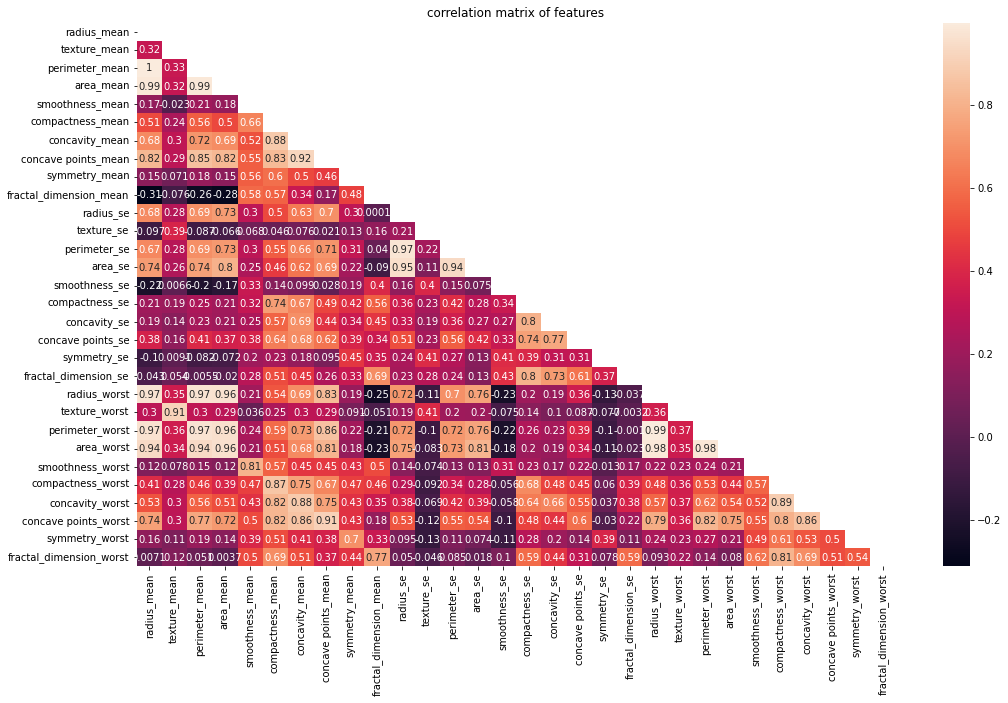

In [7]:
# lets eleminate highly correlated features first
#correlation matrix
Util.show_corr(features_df, "correlation matrix of features")

In [8]:
features_df2 = Util.remove_correlated(features_df, 0.95)
features_df2.head()

INFO:utils:correlated variables successfully removed


number of correlated variables: 7
..................................................
correlated features:  {'radius_worst', 'perimeter_se', 'area_se', 'perimeter_mean', 'area_mean', 'area_worst', 'perimeter_worst'}


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
Util.forest_test(features_df2, target_df)

INFO:utils:forest test successful


accuracy score: 0.9649122807017544


In [10]:
selected_feat = Util.select_features_RFE(features_df2, target_df, 9)
selected_feat.head()

INFO:utils:successfully selected features


,radius_mean,texture_mean,concave points_mean,radius_se,concavity_se,fractal_dimension_se,texture_worst,concavity_worst,concave points_worst
0,17.99,10.38,0.14710,1.0950,0.05373,0.006193,17.33,0.7119,0.2654
1,20.57,17.77,0.07017,0.5435,0.01860,0.003532,23.41,0.2416,0.1860
2,19.69,21.25,0.12790,0.7456,0.03832,0.004571,25.53,0.4504,0.2430
3,11.42,20.38,0.10520,0.4956,0.05661,0.009208,26.50,0.6869,0.2575
4,20.29,14.34,0.10430,0.7572,0.05688,0.005115,16.67,0.4000,0.1625


In [11]:
Util.forest_test(selected_feat, target_df)

INFO:utils:forest test successful


accuracy score: 0.9707602339181286


### Observation
- As can be seen from the random forest regression test, the accuracy has decreased only by 1%

### Scaling and Normalization

In [12]:
# scaling and normalizing
scaled = Util.scale_and_normalize(selected_feat)
scaled.head()

INFO:utils:variables scaled successfully
INFO:utils:variables normalized succesfully
INFO:utils:variables successfully scaled and normalized


,radius_mean,texture_mean,concave points_mean,radius_se,concavity_se,fractal_dimension_se,texture_worst,concavity_worst,concave points_worst
0,0.354487,0.015415,0.497412,0.242304,0.092311,0.124533,0.096286,0.386853,0.620496
1,0.591441,0.250661,0.320720,0.143861,0.043194,0.083786,0.279167,0.177458,0.587791
2,0.430431,0.279271,0.454898,0.164318,0.069247,0.090885,0.257670,0.257434,0.597564
3,0.156464,0.268733,0.389399,0.103587,0.106465,0.213894,0.287417,0.408598,0.659009
4,0.571254,0.142001,0.470131,0.212055,0.130265,0.132227,0.112396,0.289747,0.506434


## Causal Graph Discovery

In [13]:
# rejoin target and features
pure_df = selected_feat.copy()
pure_df["target"] = LabelEncoder().fit_transform(target_df)

# 1 means Malignunt and 0 means Benign 
pure_df.head()

,radius_mean,texture_mean,concave points_mean,radius_se,concavity_se,fractal_dimension_se,texture_worst,concavity_worst,concave points_worst,target
0,17.99,10.38,0.14710,1.0950,0.05373,0.006193,17.33,0.7119,0.2654,1
1,20.57,17.77,0.07017,0.5435,0.01860,0.003532,23.41,0.2416,0.1860,1
2,19.69,21.25,0.12790,0.7456,0.03832,0.004571,25.53,0.4504,0.2430,1
3,11.42,20.38,0.10520,0.4956,0.05661,0.009208,26.50,0.6869,0.2575,1
4,20.29,14.34,0.10430,0.7572,0.05688,0.005115,16.67,0.4000,0.1625,1


In [14]:
factor = len(pure_df)/100
pure_20 = pure_df.sample(int(20*factor), random_state=11)
print(f"size of pure_20 : {len(pure_20)}")
pure_40 = pure_df.sample(int(40*factor), random_state=11)
print(f"size of pure_40 : {len(pure_40)}")
pure_60 = pure_df.sample(int(60*factor), random_state=11)
print(f"size of pure_60 : {len(pure_60)}")
pure_80 = pure_df.sample(int(80*factor), random_state=11)
print(f"size of pure_80 : {len(pure_80)}")
print(f"size of pure_100 : {len(pure_df)}")

size of pure_20 : 113
size of pure_40 : 227
size of pure_60 : 341
size of pure_80 : 455
size of pure_100 : 569


In [15]:
# generate the ground truth structure
ground_truth = from_pandas(pure_df, tabu_parent_nodes=["target"])

In [16]:
# generate structures from fractional datasets

sm20 = from_pandas(pure_20, tabu_parent_nodes=["target"])
sm40 = from_pandas(pure_40, tabu_parent_nodes=["target"])
sm60 = from_pandas(pure_60, tabu_parent_nodes=["target"])
sm80 = from_pandas(pure_80, tabu_parent_nodes=["target"])

### Check Stability of Graph

INFO:utils:treshold successfully applied
INFO:utils:graph successfully generated


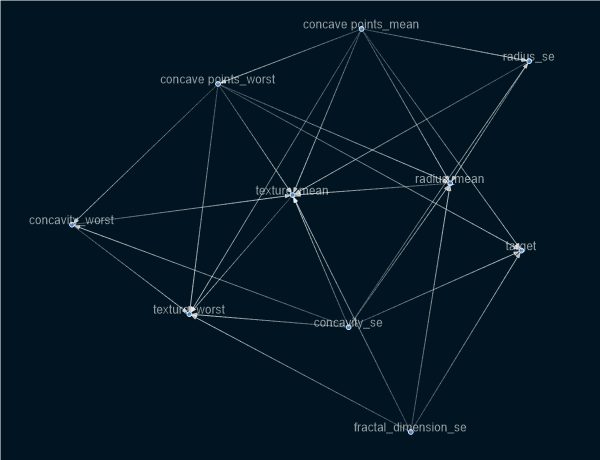

In [17]:
Util.plot_graph(ground_truth, 0.8)

INFO:utils:jaccard index successfully calculated
INFO:utils:treshold successfully applied


The similarity index: 0.87


INFO:utils:graph successfully generated


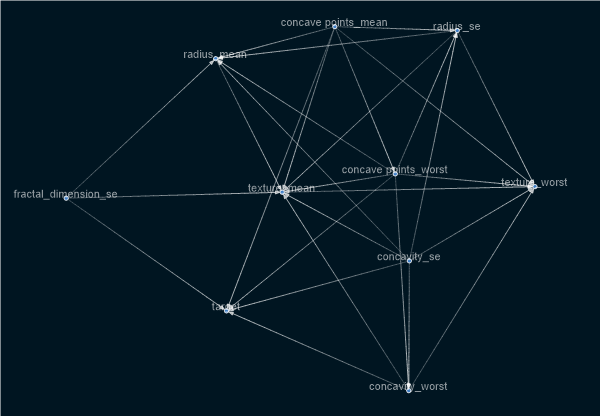

In [18]:
print(Util.jacc_index(ground_truth,sm20, 0.8, 0.8))
Util.plot_graph(sm20, 0.8)

INFO:utils:jaccard index successfully calculated
INFO:utils:treshold successfully applied


The similarity index: 0.93


INFO:utils:graph successfully generated


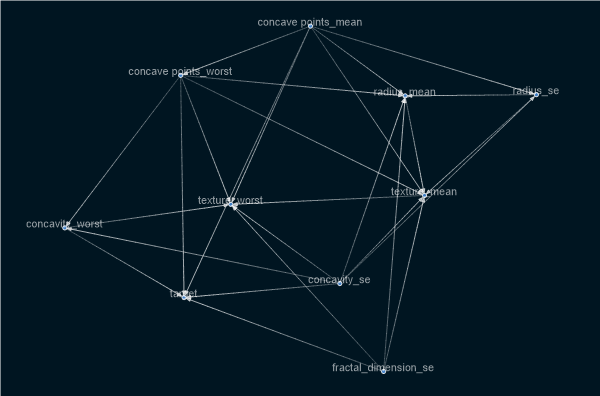

In [21]:
print(Util.jacc_index(ground_truth,sm40, 0.8, 0.8))
Util.plot_graph(sm40, 0.8)

INFO:utils:jaccard index successfully calculated
INFO:utils:treshold successfully applied


The similarity index: 0.9


INFO:utils:graph successfully generated


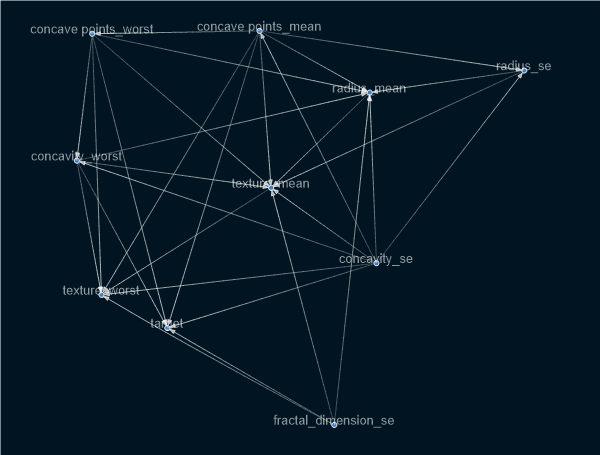

In [22]:
print(Util.jacc_index(ground_truth,sm60, 0.8, 0.8))
Util.plot_graph(sm60, 0.8)

INFO:utils:jaccard index successfully calculated
INFO:utils:treshold successfully applied


The similarity index: 0.9


INFO:utils:graph successfully generated


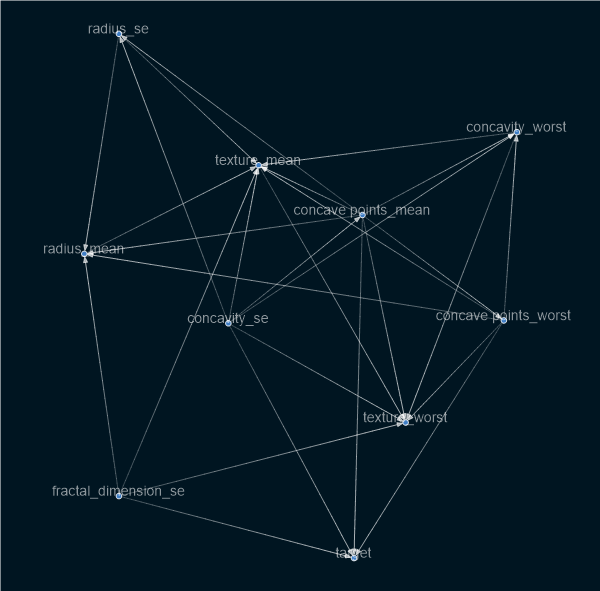

In [24]:
print(Util.jacc_index(ground_truth,sm80, 0.8, 0.8))
Util.plot_graph(sm80, 0.8)

In [26]:
def filter_by_blanket(sm, features, node):
    """
    extracts markov blanket and fitlers features with it

    Args:
        sm: structural model
        features: a dataframe with all variables
        node: the target node name in string

    Returns:
        compact_feats: the data with selected features
    """
    blanket = sm.get_markov_blanket(node)
    print(blanket.edges)

    parents = set()
    for item in blanket.edges:
        for val in item:
            if(val != "target"):
                parents.add(val)

    parents = list(parents)
    print(f"selected variables: {parents}")

    compact_feats = features[parents] 

    return [compact_feats, blanket]
    

## Modeling

### Preparing Data and Graph

In [38]:
# preparing data for logistic regression modelling
original_x = selected_feat
original_y = target_df.apply(lambda x: 0 if x=="B" else 1)
original_full = original_x.copy()
original_full["target"] = original_y

filtered = filter_by_blanket(Util.apply_treshold(ground_truth, 0.8), original_x, "target")
filtered_x = filtered[0]
filtered_y = original_y
filtered_full = filtered_x.copy()
filtered_full["target"] = filtered_y


# preparing graphs for bayesian network modeling
original_sm = Util.apply_treshold(ground_truth, 0.8)
filtered_sm = filtered[1]

INFO:utils:treshold successfully applied
INFO:utils:treshold successfully applied


[('concavity_se', 'target'), ('concave points_worst', 'target'), ('concave points_mean', 'concave points_worst'), ('concave points_mean', 'target'), ('fractal_dimension_se', 'target')]
selected variables: ['concavity_se', 'concave points_worst', 'fractal_dimension_se', 'concave points_mean']


### Bayesian Network Modeling

In [29]:
def data_descretiser(df, features_list, target_name):
    
    tree_discretiser = DecisionTreeSupervisedDiscretiserMethod(
        mode="single", 
        tree_params={"max_depth": 2, "random_state": 2022},
    )
    tree_discretiser.fit(
        feat_names=features_list, 
        dataframe=df, 
        target_continuous=True,
        target=target_name,
    )

    desc_df = df.copy()
    for col in features_list:
        desc_df[col] = tree_discretiser.transform(desc_df[[col]])
    
    return desc_df

In [31]:

desc_ori_df = data_descretiser(original_full, original_x.columns.to_list(), "target")
desc_filt_df = data_descretiser(filtered_full, filtered_x.columns.to_list(), "target")

In [43]:
def get_bayesian_net(df, train, sm):
    bn = BayesianNetwork(sm)
    bn = bn.fit_node_states(df)
    bn = bn.fit_cpds(
        train, 
        method="BayesianEstimator", 
        bayes_prior="K2",
    )

    return bn


In [44]:
# split dataset.
train_o, test_o = train_test_split( desc_ori_df, train_size=0.8, test_size=0.2, random_state=27)
train_f, test_f = train_test_split( desc_filt_df, train_size=0.8, test_size=0.2, random_state=27)

In [45]:
# create Bayesian Network
bn1 = get_bayesian_net(desc_ori_df, train_o, original_sm)
bn2 = get_bayesian_net(desc_filt_df, train_f, filtered_sm)

In [46]:
pred_v1 = bn1.predict(test_o, 'target')
true_v1 = test_o['target']

pred_v2 = bn2.predict(test_f, 'target')
true_v2 = test_f['target']

In [51]:
print('Recall: {:.4f}'.format(recall_score(y_true=true_v1, y_pred=pred_v1)))
print('F1: {:.4f} '.format(f1_score(y_true=true_v1, y_pred=pred_v1)))
print('Accuracy: {:.4f} '.format(accuracy_score(y_true=true_v1, y_pred=pred_v1)))
print('Precision: {:.4f} '.format(precision_score(y_true=true_v1, y_pred=pred_v1)))

Recall: 0.8222
F1: 0.8706 
Accuracy: 0.9035 
Precision: 0.9250 


In [52]:
print('Recall: {:.4f}'.format(recall_score(y_true=true_v2, y_pred=pred_v2)))
print('F1: {:.4f} '.format(f1_score(y_true=true_v2, y_pred=pred_v2)))
print('Accuracy: {:.4f} '.format(accuracy_score(y_true=true_v2, y_pred=pred_v2)))
print('Precision: {:.4f} '.format(precision_score(y_true=true_v2, y_pred=pred_v2)))

Recall: 0.8222
F1: 0.8706 
Accuracy: 0.9035 
Precision: 0.9250 


### Observation
- as can be seen from the above results the prediction ability of the data is the same 

## Logistic Regression Modeling

In [ ]:
compact_data.head()

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
X = compact_feats
Y = compact_data["target"]
X2 = features_df
Y2 = target_df.apply(lambda x: 0 if x=="B" else 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=0)
logreg2 = LogisticRegression()
logreg2.fit(X_train2, y_train2)

In [ ]:
y_pred2 = logreg2.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test2, y_test2)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_pred2)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

In [ ]:
from matplotlib import pyplot
importance = logreg.coef_[0]
cols = compact_feats.columns.to_list()

f = pyplot.figure()
f.set_figwidth(10)
f.set_figheight(5)
pyplot.bar(x=cols, height=importance)
pyplot.show()

In [ ]:
from matplotlib import pyplot
importance = logreg2.coef_[0][1:]
cols = features_df.columns.to_list()[1:]

f = pyplot.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.xticks(rotation=90)
pyplot.bar(x=cols, height=importance)
pyplot.show()

In [ ]:
importance